In [1]:
# 📦 Install & Import all libraries
!pip install wordcloud

import numpy as np
import pandas as pd
import difflib
import random
import textwrap
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [4]:
# 📄 Load Dataset
# Make sure 'movies.csv' is uploaded to your Colab runtime


# Load CSV
# 📄 Load Dataset
movies_data = pd.read_csv('movies.csv')

In [5]:
# ✅ Fill missing values
selected_features = ['genres', 'keywords', 'tagline', 'cast', 'director', 'overview']

for feature in selected_features:
    movies_data[feature] = movies_data[feature].fillna('')

# 🧬 Combine selected features
combined_features = (
    movies_data['genres'] + ' ' +
    movies_data['keywords'] + ' ' +
    movies_data['tagline'] + ' ' +
    movies_data['cast'] + ' ' +
    movies_data['director']
)


In [6]:
# 🔢 TF-IDF vectorization
vectorizer = TfidfVectorizer()
feature_vectors = vectorizer.fit_transform(combined_features)

# 📏 Cosine similarity matrix
similarity = cosine_similarity(feature_vectors)


In [7]:
# 🎨 Helper functions

def format_cast(cast_text):
    return ', '.join([p.strip() for p in cast_text.split(',') if p.strip()])

def paragraph(text, width=90):
    return '\n'.join(textwrap.wrap(text, width))

def random_bright_color(*args, **kwargs):
    return f"hsl({random.randint(0, 360)}, 100%, 70%)"


In [8]:
# 🎬 Recommendation Function

def recommend_movie(movie_input):
    movie_titles = movies_data['title'].tolist()

    # Try exact match first
    exact_match = [title for title in movie_titles if title.lower() == movie_input.lower()]
    if exact_match:
        selected = exact_match[0]
        print(f"\n✅ Exact Match Found: {selected}\n")
    else:
        closest = difflib.get_close_matches(movie_input, movie_titles, n=1)
        if not closest:
            print(f"❌ Movie '{movie_input}' not found.")
            return
        selected = closest[0]
        print(f"❌ Exact match not found for '{movie_input}'")
        print(f"✅ Closest Match: {selected}\n")

    idx = movies_data[movies_data['title'] == selected].index[0]
    movie = movies_data.iloc[idx]

    # 🎬 Movie Details
    print(f"🎬 Title: {movie['title']}")
    print(f"🎭 Cast: {format_cast(movie['cast'])}")
    print(f"🎬 Director: {movie['director']}")
    print(f"📝 Tagline: {movie['tagline']}")
    print(f"\n📖 Overview:\n{paragraph(movie['overview'])}")
    print(f"\n⭐ Rating: {movie['vote_average']} /10")
    print(f"🔥 Popularity: {round(movie['popularity'], 1)}")
    print(f"💰 Budget: ${int(movie['budget'])}")
    print(f"🕐 Runtime: {movie['runtime']} min")
    print(f"🗣️ Language: {movie['original_language']}")
    print(f"📅 Release Date: {movie['release_date']}")
    print(f"🎭 Genres: {movie['genres']}\n")

    # 🔝 Top 30 similar movies
    similarity_scores = list(enumerate(similarity[idx]))
    sorted_movies = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[1:31]

    print("🎯 TOP 30 SIMILAR MOVIES:\n")
    print(f"{'No.':<4} {'Movie Title':<35} {'⭐ Rating':<10} {'🔥 Popularity'}")
    print("-" * 65)

    titles, ratings, pops = [], [], []

    for i, (movie_idx, _) in enumerate(sorted_movies, 1):
        sim_movie = movies_data.iloc[movie_idx]
        titles.append(sim_movie['title'])
        ratings.append(round(sim_movie['vote_average'], 1))
        pops.append(round(sim_movie['popularity'], 1))
        print(f"{i:<4} {sim_movie['title']:<35.32} ⭐ {ratings[-1]:<8} 🔥 {pops[-1]}")

    # ☁️ WordCloud
    text = ' '.join(movies_data['genres'] + ' ' + movies_data['keywords'])
    wordcloud = WordCloud(width=1000, height=400, background_color='black',
                          color_func=random_bright_color, max_words=200).generate(text)

    plt.figure(figsize=(14, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("🎭 WordCloud: Genres & Keywords", fontsize=16, color='white')
    plt.tight_layout()
    plt.show()

    # 📈 Line Plot for Ratings and Popularity
    plt.figure(figsize=(14, 6))
    x = [f"{i+1}. {title}" for i, title in enumerate(titles)]

    plt.plot(x, ratings, label='⭐ Rating', color='limegreen', marker='o', linewidth=2)
    plt.plot(x, pops, label='🔥 Popularity', color='dodgerblue', marker='o', linewidth=2)

    plt.title('📊 Ratings & Popularity of Similar Movies', fontsize=16, weight='bold')
    plt.xlabel('Movie')
    plt.ylabel('Value')
    plt.xticks(rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()


🎬 Enter a movie name: Avatar

✅ Exact Match Found: Avatar

🎬 Title: Avatar
🎭 Cast: Sam Worthington Zoe Saldana Sigourney Weaver Stephen Lang Michelle Rodriguez
🎬 Director: James Cameron
📝 Tagline: Enter the World of Pandora.

📖 Overview:
In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique
mission, but becomes torn between following orders and protecting an alien civilization.

⭐ Rating: 7.2 /10
🔥 Popularity: 150.4
💰 Budget: $237000000
🕐 Runtime: 162.0 min
🗣️ Language: en
📅 Release Date: 2009-12-10
🎭 Genres: Action Adventure Fantasy Science Fiction

🎯 TOP 30 SIMILAR MOVIES:

No.  Movie Title                         ⭐ Rating   🔥 Popularity
-----------------------------------------------------------------
1    Alien                               ⭐ 7.9      🔥 94.2
2    Aliens                              ⭐ 7.7      🔥 67.7
3    Guardians of the Galaxy             ⭐ 7.9      🔥 481.1
4    Star Trek Beyond                    ⭐ 6.6      🔥 65.4
5    Star Trek I

/tmp/ipython-input-4168215713.py:63: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


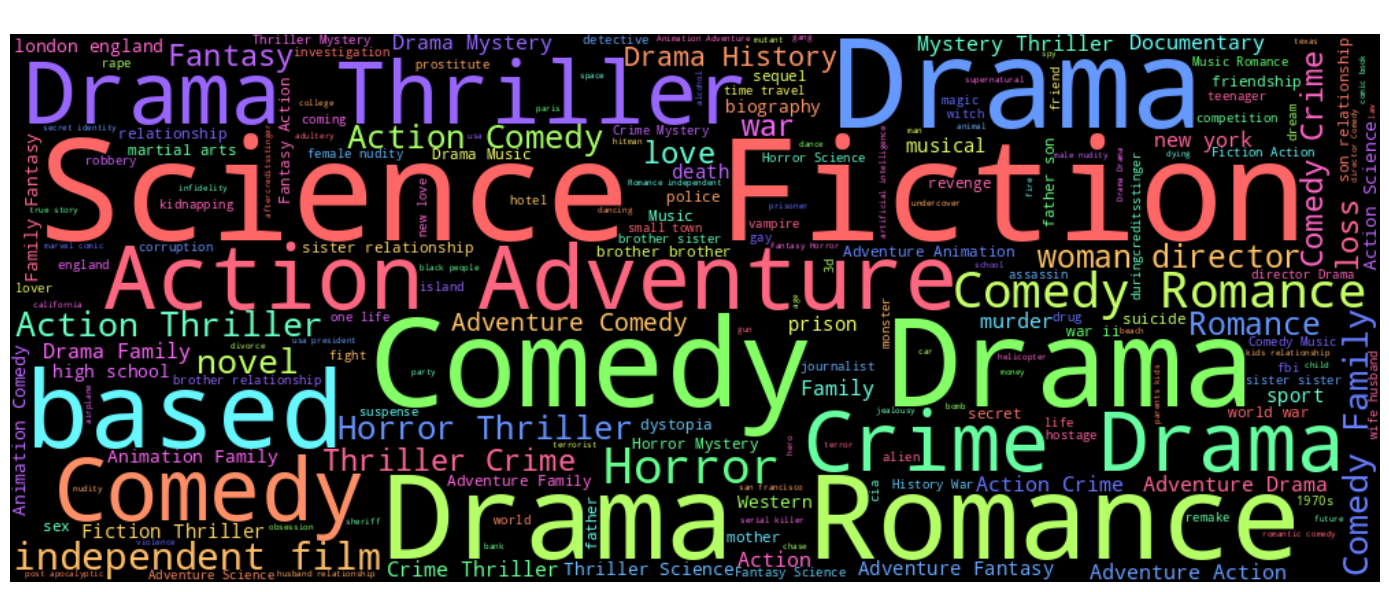

/tmp/ipython-input-4168215713.py:78: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4168215713.py:78: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4168215713.py:78: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


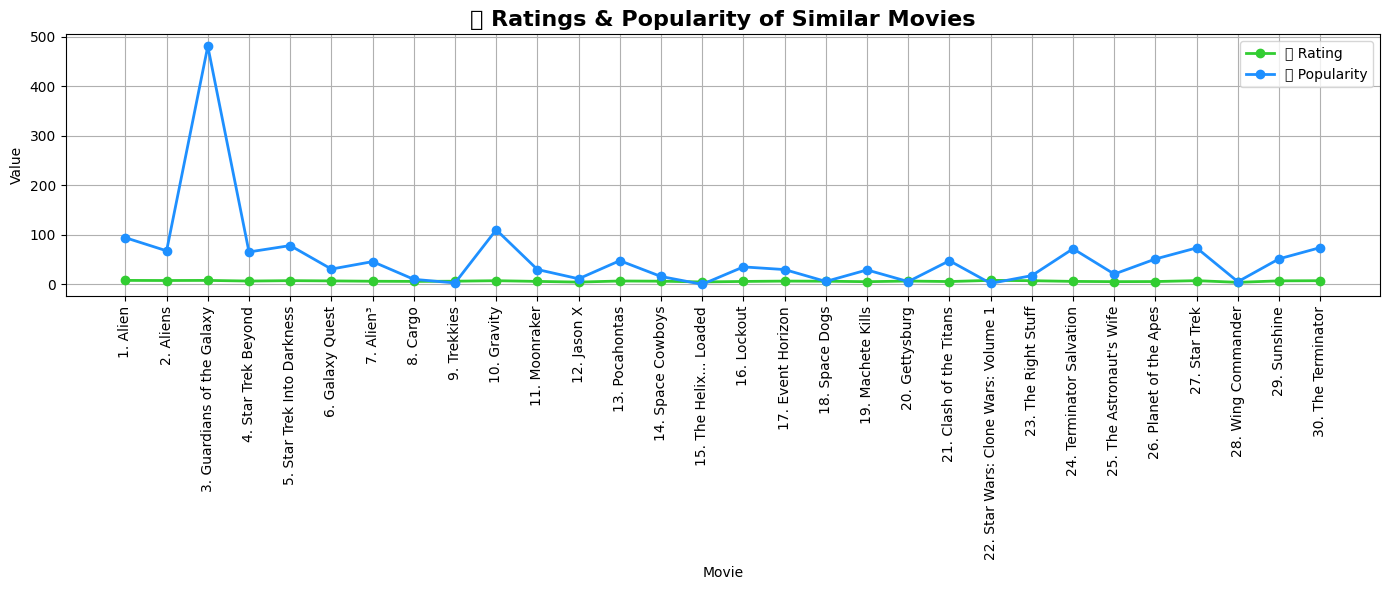

In [12]:
# 🔽 Run
movie_name = input("🎬 Enter a movie name: ")
recommend_movie(movie_name)
